In [34]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2

from import_class import DataHandler
from CNN_class import CNN_3

In [2]:
data_handler = DataHandler()

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1738119345.421396    4963 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738119345.449590    4963 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738119345.449686    4963 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738119345.451434    4963 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [44]:
train_dataset, val_dataset, X_test, y_test = data_handler.load_data("all_inputs_down_samp256.npy","all_targets_down_samp256.npy")

input shape: (3467, 256, 256, 1)
X test shape: (694, 256, 256, 1)


In [4]:
cnn = CNN_3((256,256,1),conv_dim=32,k_dim=3,pool_dim=3,pooling_type='average')

/home/bea/anaconda3/envs/tf2/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
cnn.compile_model(learning_rate=0.00001)

In [6]:
training = cnn.train_model(train_data=train_dataset, validation_data=val_dataset,checkpoint_path='checkpoint.best_256intensity.keras')

Epoch 1/1000


I0000 00:00:1738119359.363330    5097 service.cc:146] XLA service 0x79a934002640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738119359.363347    5097 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-01-28 19:55:59.418434: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-28 19:55:59.593472: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


14/70 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4640 - loss: 0.7209

I0000 00:00:1738119362.356201    5097 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.4612 - loss: 0.7197 - val_accuracy: 0.5225 - val_loss: 0.6926
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5171 - loss: 0.7041 - val_accuracy: 0.5225 - val_loss: 0.6934
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5206 - loss: 0.7015 - val_accuracy: 0.5189 - val_loss: 0.6927
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5330 - loss: 0.6993 - val_accuracy: 0.4829 - val_loss: 0.6975
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5429 - loss: 0.6957 - val_accuracy: 0.4775 - val_loss: 0.7093
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5522 - loss: 0.6906 - val_accuracy: 0.4775 - val_loss: 0.7214
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5657 - loss: 0.6851 - val_accuracy: 0.4811 - val_loss: 0.7260
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5741 - loss: 0.6785 - val_accuracy: 0.4757 

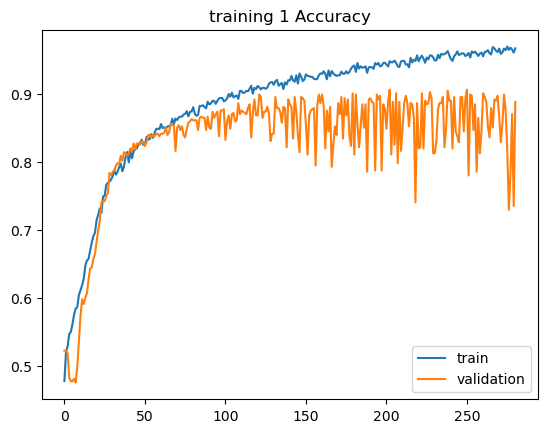

In [17]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='lower right')
plt.title('training 1 Accuracy')
plt.savefig('256intensity/training 1 accuracy.tiff')
plt.show()

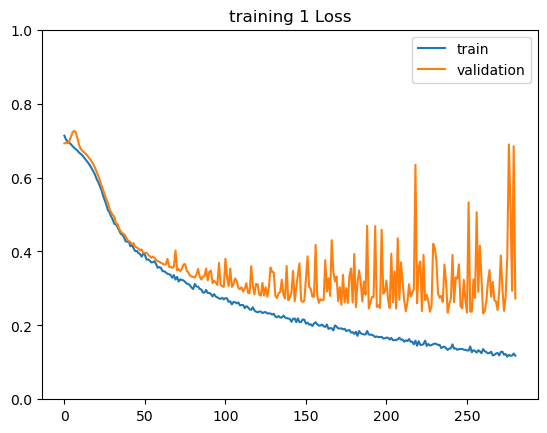

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['train','validation'])
plt.title('training 1 Loss')
plt.ylim(0,1)
plt.savefig('256intensity/training 1 loss.tiff')
plt.show()

In [21]:
"max val accuracy: {0}, min val loss: {1}".format(max(training.history['val_accuracy']),min(training.history['val_loss']))

'max val accuracy: 0.9063063263893127, min val loss: 0.23233923316001892'

In [27]:
CNN_3.evaluate_model(training,X_test=X_test,y_test=y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8700 - loss: 0.3073


[0.29285451769828796, 0.8746397495269775]

In [28]:
from tensorflow.keras.models import load_model

best_model = load_model('checkpoint.best_256intensity.keras')

In [29]:
test_loss, test_acc = best_model.evaluate(X_test, y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8700 - loss: 0.3073


In [30]:
'Test loss:{0}, Test accuracy: {1}'.format(test_loss,test_acc)

'Test loss:0.29285451769828796, Test accuracy: 0.8746397495269775'

In [45]:
negative_path = 'Sheet 5/test_images/'

# initialize storage of data and labels
images2 = []
labels2 = []

for f in os.listdir(negative_path):
    intensity_image = cv2.imread(negative_path + f)
    down_samp = cv2.resize(intensity_image, (256,256), interpolation=cv2.INTER_LINEAR)
    reshaped_intensity = np.mean(down_samp, axis=-1) 
    image_array = np.expand_dims(reshaped_intensity, axis=-1)
    rescaled_array = image_array/255.0
    images2.append(rescaled_array)
    #print(file)
    #image_tensor = tf.convert_to_tensor(image_array, dtype=tf.float32)
    #rescaled_tensor = image_tensor/255.0
    #images2.append(rescaled_tensor)
    labels2.append(0.0)

test_x = np.array(images2)  
test_y = np.array(labels2)  

In [38]:
test_x

array([[[[0.37647059],
         [0.33333333],
         [0.36078431],
         ...,
         [0.66666667],
         [0.59215686],
         [0.57254902]],

        [[0.3254902 ],
         [0.19215686],
         [0.49411765],
         ...,
         [0.4       ],
         [0.47058824],
         [0.54117647]],

        [[0.50980392],
         [0.26666667],
         [0.0745098 ],
         ...,
         [0.51764706],
         [0.49411765],
         [0.52156863]],

        ...,

        [[0.5254902 ],
         [0.45098039],
         [0.29411765],
         ...,
         [0.11764706],
         [0.16862745],
         [0.29803922]],

        [[0.61176471],
         [0.52941176],
         [0.04705882],
         ...,
         [0.59215686],
         [0.37254902],
         [0.10980392]],

        [[0.52156863],
         [0.59607843],
         [0.29019608],
         ...,
         [0.49411765],
         [0.41176471],
         [0.4       ]]],


       [[[0.23529412],
         [0.27843137],
         [0.37

In [46]:
test_loss, test_acc = CNN_3.evaluate_model(training, test_x, test_y)
'Test loss:{0}, Test accuracy: {1}'.format(test_loss,test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.4700 - loss: 1.5234


'Test loss:1.5020215511322021, Test accuracy: 0.47058823704719543'

In [40]:
# Predict the values from the testing dataset
Y_pred_probs = best_model.predict(test_x)
Y_pred = np.array(Y_pred_probs>=.5)
# compute the confusion matrix
#confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred) 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Text(0, 0.5, 'freq')

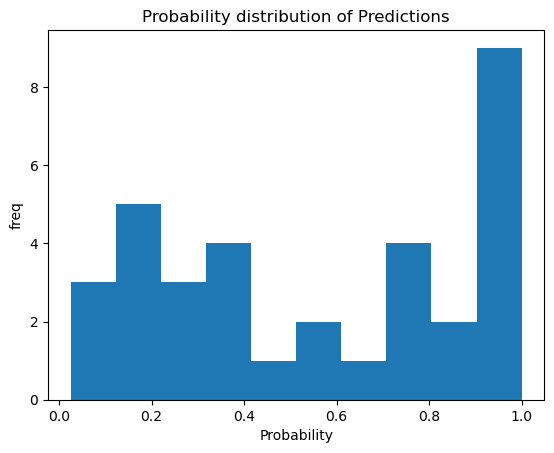

In [41]:
plt.hist(Y_pred_probs.flatten())
plt.title('Probability distribution of Predictions')
plt.xlabel('Probability')
plt.ylabel('freq')

Text(0, 0.5, 'freq')

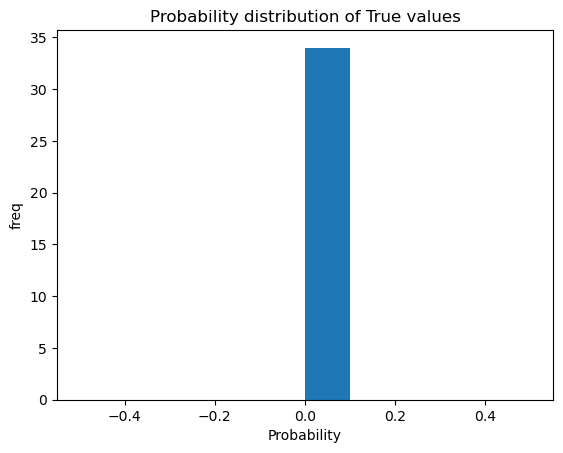

In [42]:
plt.hist(test_y)
plt.title('Probability distribution of True values')
plt.xlabel('Probability')
plt.ylabel('freq')

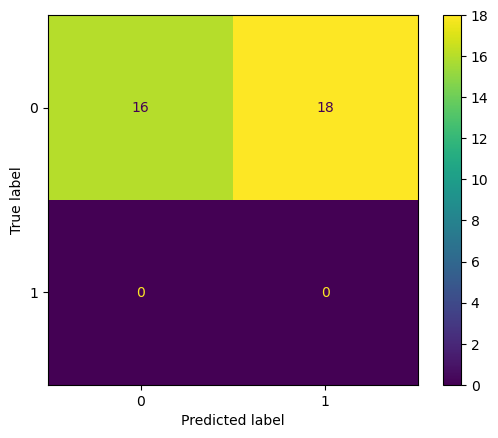

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y, Y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [32]:
sk.metrics.accuracy_score(test_y, Y_pred)

0.2647058823529412

In [25]:
sk.metrics.precision_score(test_y, Y_pred)

0.0

In [26]:
sk.metrics.recall_score(test_y, Y_pred)

/home/user/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0